                                                    import needed                                   

In [170]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score   

                                                                READ DATA                                   

In [147]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [148]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [150]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

                                                        preprocessing                   


In [151]:
df.drop("User ID", axis="columns",inplace=True)

In [152]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [153]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [154]:
if "Male" in df['Gender'].unique() :
    df['Gender']=df['Gender'].map({"Male":1,"Female":0})

                                             correlation matrix                      

Text(0.5, 1.0, 'corr matrix of Social Network Ads')

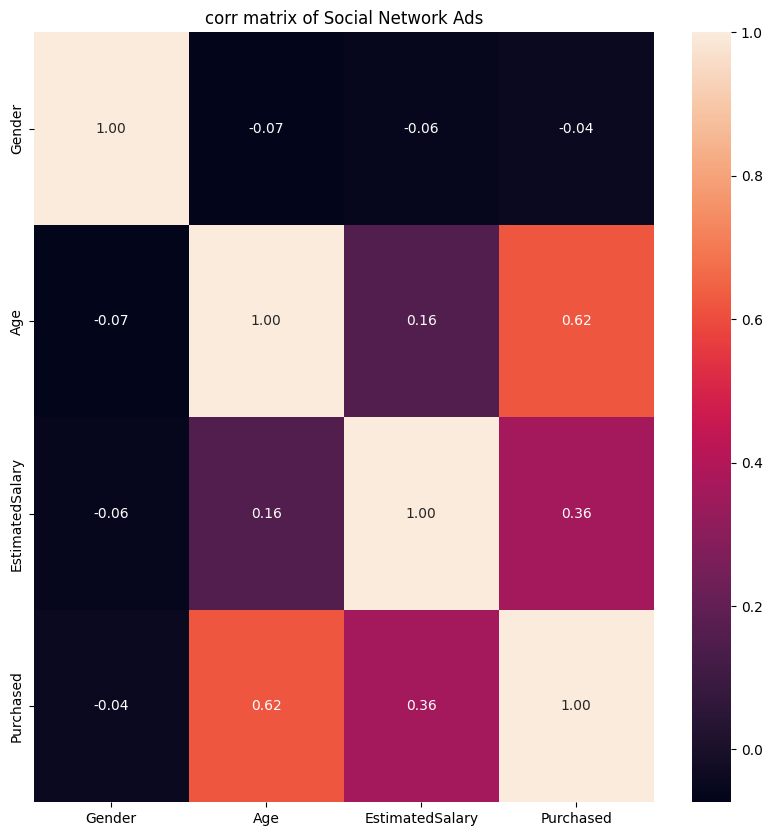

In [155]:
corr_m=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_m,annot=True,fmt="0.2f")
plt.title("corr matrix of Social Network Ads")

In [156]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

                                             build model by xgboost                     

In [157]:
x=df.drop('Purchased',axis="columns")
y=df['Purchased']

In [158]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [159]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [171]:
model=SVC(max_iter=10000)
model.fit(x_train,y_train)



SVC(max_iter=10000)

In [172]:
y_pre=model.predict(x_test)
acc=accuracy_score(y_test,y_pre)
print("accuracy score:",acc)

accuracy score: 0.9416666666666667
